<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Regresión polinomial

Ejemplo de regresión polinomial<br>
v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('FuelConsumptionCo2.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/FuelConsumptionCo2.csv > FuelConsumptionCo2.csv
    else:
        !wget FuelConsumptionCo2.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/FuelConsumptionCo2.csv

### `FuelConsumption.csv`:
El dataset **`FuelConsumption.csv`** contiene el consumo específico por tipo de vehículo y la emisión estimado de dioxido de carbono (Co2) de nuevos vehículos que son venidos en canada.<br> [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** --> ejemplo 2014
- **MAKE** --> ejemplo Acura
- **MODEL** --> ejemplo ILX
- **VEHICLE CLASS** --> ejemplo SUV
- **ENGINE SIZE** --> ejemplo 4.7
- **CYLINDERS** --> ejemplo 6
- **TRANSMISSION** --> ejemplo A6
- **FUEL CONSUMPTION in CITY(L/100 km)** --> ejemplo 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** --> ejemplo 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** --> ejemplo 9.2
- **CO2 EMISSIONS (g/km)** --> ejemplo 182

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [37]:
df = pd.read_csv("FuelConsumptionCo2.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000
Nan,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [38]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Fin de la limpieza
Se finalizó la limpieza, no hay datos mal cargados o incompletos en este dataset

In [42]:
print('Cantidad de datos en observacion:', df.shape[0])

Cantidad de datos en observacion: 1067


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

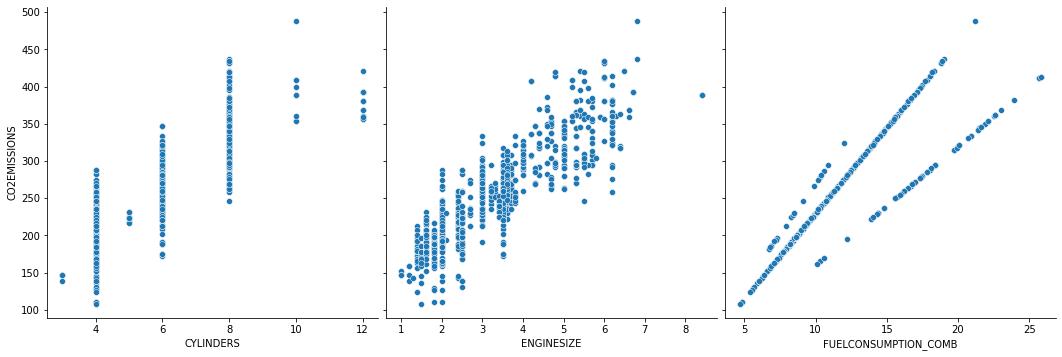

In [6]:
# Analizaremos como se compartan algunos atributos de entrada contra el objetivo (las emisiones, el Co2)
pp = sns.pairplot(data=df, x_vars=['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB'], y_vars=['CO2EMISSIONS'], diag_kind=None, height=5)
plt.show()


Se puede observar que todas tienen una relación lineal con le emisión de CO2, pero para este ejemplo nos quedaremos con las cilindradas del motor para evaluar contra el CO2. Queda en la voluntad del alumno de seguir experimentando con otros features

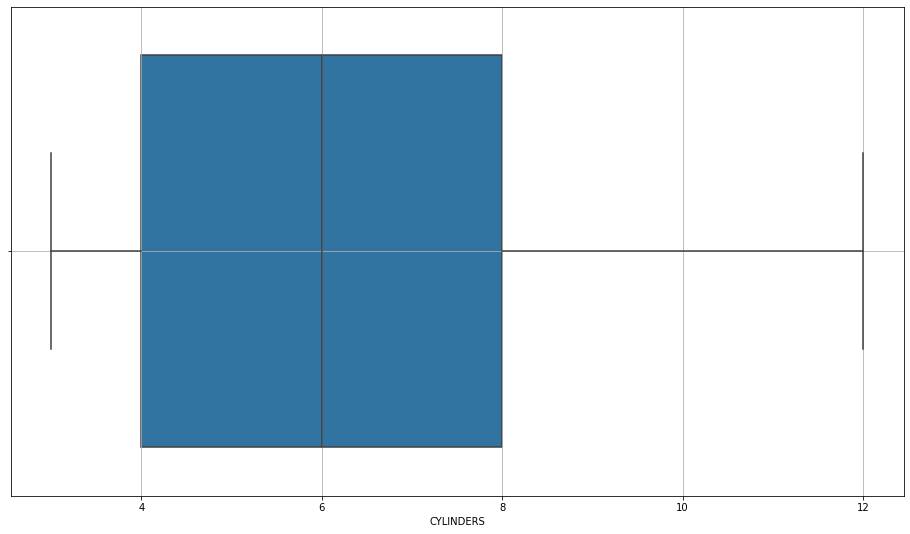

In [52]:
# Analizamos la distribución de la variable que se desea analizar
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
sns.boxplot(x=df['CYLINDERS'], ax=ax)
ax.grid('dashed')

Se puede observar que está centrada a la izquierda la distribución y no hay outliers, por lo que no habrá problema. El hecho de que la distribución esté marcada a la izquierda querra decir que hay menos datos para analizar de alta cilindrada.

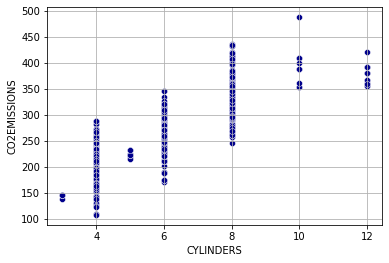

In [55]:
fig = plt.figure()
ax = fig.add_subplot()
ax = sns.scatterplot(x=df['CYLINDERS'], y=df['CO2EMISSIONS'], color='darkBlue', ax=ax)
ax.grid('dashed')
plt.show()

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [56]:
X = df[['CYLINDERS']].values
y = df['CO2EMISSIONS'].values

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Crear un modelo de regresión polinominal

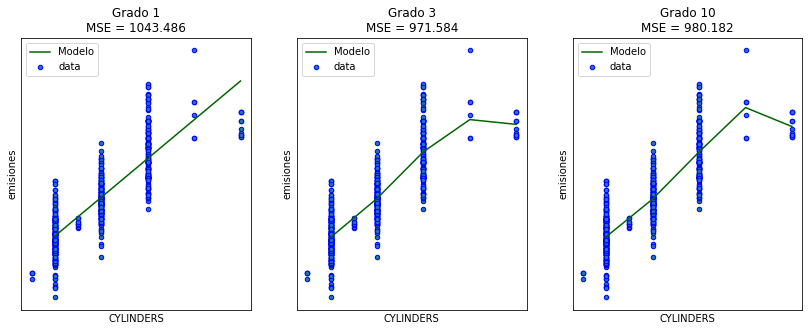

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

mse_train_list = []
mse_test_list = []
degrees_to_plot = [1, 3, 10]
max_dregree = max(degrees_to_plot)

plt.figure(figsize=(14, 5))
for degree in range(1, (max_dregree+1)):

    plot_number = 0
    try:
        plot_number = degrees_to_plot.index(degree) + 1
    except:
        plot_number = 0

    if plot_number > 0:
        ax = plt.subplot(1, len(degrees_to_plot), plot_number)
        plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures()
    poly = PolynomialFeatures(degree=degree)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)
    y_hat = lr.predict(X_test_poly)
    y_hat_train = lr.predict(X_train_poly)

    mse = mean_squared_error(y_test, y_hat)
    mse_train = mean_squared_error(y_train, y_hat_train)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse)

    if plot_number > 0:

        lx = sorted(X_test)
        lx_poly = poly.fit_transform(lx)
        ly = lr.predict(lx_poly)

        plt.plot(lx, ly, label="Modelo", color='darkGreen')
        plt.scatter(X_train, y_train, edgecolor='b', s=20, label="data")
        plt.xlabel("CYLINDERS")
        plt.ylabel("emisiones")
        plt.legend()
        plt.title("Grado {}\nMSE = {:.3f}".format(degree, mse))

plt.show()

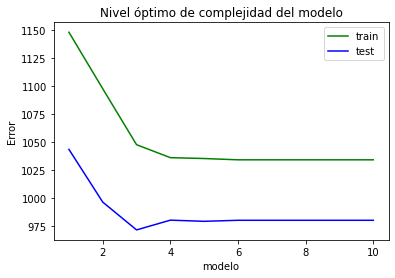

Nivel óptimo: 3


In [68]:
plt.plot(range(1, (max_dregree+1)), mse_train_list, c='g', label="train")
plt.plot(range(1, (max_dregree+1)), mse_test_list, c='b', label="test")
plt.xlabel("modelo")
plt.ylabel("Error")
plt.legend()
plt.title("Nivel óptimo de complejidad del modelo")
plt.show()
print('Nivel óptimo:', mse_test_list.index(min(mse_test_list))+1)

Construir el modelo que mejor ajuste al problema

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features = PolynomialFeatures()
poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_hat = lr.predict(X_test_poly)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [50]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_hat)
print(f"Coeficiente de determinación: {score:.2f}")

Coeficiente de determinación: 0.76


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

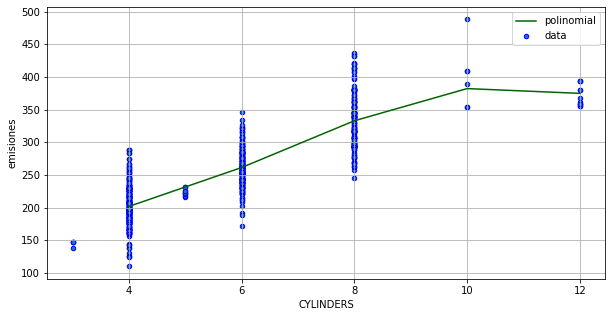

In [51]:
lx = sorted(X_test)
lx_poly = poly.fit_transform(lx)
ly = lr.predict(lx_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

ax.plot(lx, ly, label="polinomial", color='darkGreen')
ax.scatter(X_train, y_train, edgecolor='b', s=20, label="data")
ax.set_xlabel("CYLINDERS")
ax.set_ylabel("emisiones")
ax.legend()
ax.grid('dashed')
plt.show()

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

En este ejemplo emisiones de CO2 se puede realizar todos los tipos de regresioens estudiadas hasta el momento, en este caso solo se comparó contra la cilindrada utilizando una gresión polinomial